# Lecture 2

In [1]:
library(xlsx)

In [3]:
data <- read.xlsx("data/telecom_users.xlsx", sheetIndex = 1, endRow = 100)
data

   customerID gender SeniorCitizen Partner Dependents tenure PhoneService    MultipleLines InternetService
1  7010-BRBUU   Male             0     Yes        Yes     72          Yes              Yes              No
2  9688-YGXVR Female             0      No         No     44          Yes               No     Fiber optic
3  9286-DOJGF Female             1     Yes         No     38          Yes              Yes     Fiber optic
4  6994-KERXL   Male             0      No         No      4          Yes               No             DSL
5  2181-UAESM   Male             0      No         No      2          Yes               No             DSL
6  4312-GVYNH Female             0     Yes         No     70           No No phone service             DSL
7  2495-KZNFB Female             0      No         No     33          Yes              Yes     Fiber optic
8  4367-NHWMM Female             0      No         No      1           No No phone service             DSL
9  8898-KASCD   Male             0   

In [4]:
library(dplyr)

data <- data |> filter(PhoneService == "Yes", SeniorCitizen == 1)
data


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



   customerID gender SeniorCitizen Partner Dependents tenure PhoneService MultipleLines InternetService
1  9286-DOJGF Female             1     Yes         No     38          Yes           Yes     Fiber optic
2  8016-NCFVO   Male             1      No         No     55          Yes           Yes     Fiber optic
3  2277-DJJDL   Male             1     Yes         No     60          Yes           Yes     Fiber optic
4  4871-JTKJF Female             1      No         No      1          Yes            No     Fiber optic
5  7173-TETGO Female             1     Yes         No     72          Yes           Yes     Fiber optic
6  4193-ORFCL Female             1      No         No      1          Yes            No             DSL
7  4501-UYKBC Female             1      No         No     46          Yes           Yes             DSL
8  6407-UTSLV Female             1      No         No      2          Yes            No     Fiber optic
9  1409-PHXTF   Male             1     Yes         No     54    

In [5]:
write.xlsx(data, file = "data/final_telecom_data.xlsx")

## XML

In [8]:
install.packages(c("XML", "methods"))

trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/XML_3.99-0.19.zip'
Content type 'application/zip' length 3125272 bytes (3.0 MB)
downloaded 3.0 MB



package ‘XML’ successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Yura\AppData\Local\Temp\RtmpMPINis\downloaded_packages


In [9]:
library(XML)
library(methods)
xmldataframe <- xmlToDataFrame("data/employes.xml")
xmldataframe

  ID     NAME SALARY  STARTDATE       DEPT
1  1     Rick  623.3   1/1/2012         IT
2  2      Dan  515.2  9/23/2013 Operations
3  3 Michelle    611 11/15/2014         IT
4  4     Ryan    729  5/11/2014         HR
5  5     Gary 843.25  3/27/2015    Finance
6  6     Nina    578  5/21/2013         IT
7  7    Simon  632.8  7/30/2013 Operations
8  8     Guru  722.5  6/17/2014    Finance

## JSON + API (Binance)

In [10]:
install.packages("jsonlite")
library(jsonlite)

trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/jsonlite_2.0.0.zip'
Content type 'application/zip' length 1110533 bytes (1.1 MB)
downloaded 1.1 MB



package ‘jsonlite’ successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Yura\AppData\Local\Temp\RtmpMPINis\downloaded_packages


In [11]:
market = 'BTCUSDT'
interval = '1h'
limit = 100

url <- paste0(url = "https://api.binance.com/api/v3/klines?symbol=", market ,"&interval=", interval,"&limit=", limit)
print(url) 

[1] "https://api.binance.com/api/v3/klines?symbol=BTCUSDT&interval=1h&limit=100"


In [12]:
data <- fromJSON(url) # get json and transform it to list()
data <- data[, 1:7] # let's left only 1:7 columns (from Open time to Close time)
head(data)

     [,1]            [,2]              [,3]              [,4]              [,5]              [,6]          
[1,] "1757127600000" "111216.14000000" "111307.70000000" "111000.12000000" "111082.22000000" "194.76496000"
[2,] "1757131200000" "111082.23000000" "111082.23000000" "110783.70000000" "110876.12000000" "353.63220000"
[3,] "1757134800000" "110876.12000000" "110876.13000000" "110687.69000000" "110714.00000000" "151.66886000"
[4,] "1757138400000" "110714.00000000" "110817.11000000" "110714.00000000" "110752.83000000" "96.24087000" 
[5,] "1.757142e+12"  "110752.84000000" "110829.15000000" "110750.64000000" "110825.60000000" "86.44213000" 
[6,] "1757145600000" "110825.59000000" "110968.00000000" "110774.46000000" "110952.76000000" "91.10955000" 
     [,7]           
[1,] "1757131199999"
[2,] "1757134799999"
[3,] "1757138399999"
[4,] "1757141999999"
[5,] "1757145599999"
[6,] "1757149199999"

In [13]:
data <- as.data.frame(data) # convert to dataframe
head(data)

             V1              V2              V3              V4              V5           V6            V7
1 1757127600000 111216.14000000 111307.70000000 111000.12000000 111082.22000000 194.76496000 1757131199999
2 1757131200000 111082.23000000 111082.23000000 110783.70000000 110876.12000000 353.63220000 1757134799999
3 1757134800000 110876.12000000 110876.13000000 110687.69000000 110714.00000000 151.66886000 1757138399999
4 1757138400000 110714.00000000 110817.11000000 110714.00000000 110752.83000000  96.24087000 1757141999999
5  1.757142e+12 110752.84000000 110829.15000000 110750.64000000 110825.60000000  86.44213000 1757145599999
6 1757145600000 110825.59000000 110968.00000000 110774.46000000 110952.76000000  91.10955000 1757149199999

In [14]:
colnames(data) <- c("Open_time", "Open", "High", "Low", "Close", "Volume", "Close_time")
head(data)

      Open_time            Open            High             Low           Close       Volume    Close_time
1 1757127600000 111216.14000000 111307.70000000 111000.12000000 111082.22000000 194.76496000 1757131199999
2 1757131200000 111082.23000000 111082.23000000 110783.70000000 110876.12000000 353.63220000 1757134799999
3 1757134800000 110876.12000000 110876.13000000 110687.69000000 110714.00000000 151.66886000 1757138399999
4 1757138400000 110714.00000000 110817.11000000 110714.00000000 110752.83000000  96.24087000 1757141999999
5  1.757142e+12 110752.84000000 110829.15000000 110750.64000000 110825.60000000  86.44213000 1757145599999
6 1757145600000 110825.59000000 110968.00000000 110774.46000000 110952.76000000  91.10955000 1757149199999

In [16]:
print(is.numeric(data[,1]))
print(is.numeric(data[,2]))

[1] FALSE
[1] FALSE


In [17]:
data <- as.data.frame(sapply(data, as.numeric)) # convert all columns to numeric
head(data)

     Open_time     Open     High      Low    Close    Volume   Close_time
1 1.757128e+12 111216.1 111307.7 111000.1 111082.2 194.76496 1.757131e+12
2 1.757131e+12 111082.2 111082.2 110783.7 110876.1 353.63220 1.757135e+12
3 1.757135e+12 110876.1 110876.1 110687.7 110714.0 151.66886 1.757138e+12
4 1.757138e+12 110714.0 110817.1 110714.0 110752.8  96.24087 1.757142e+12
5 1.757142e+12 110752.8 110829.1 110750.6 110825.6  86.44213 1.757146e+12
6 1.757146e+12 110825.6 110968.0 110774.5 110952.8  91.10955 1.757149e+12

In [ ]:
data$Open_time <- as.POSIXct(data$Open_time/1e3, origin = '1970-01-01')
data$Close_time <- as.POSIXct(data$Close_time/1e3, origin = '1970-01-01') 

: [1m[33mError[39m in `Ops.POSIXt()`:[22m
[33m![39m '/' not defined for "POSIXt" objects

In [20]:
tail(data)

              Open_time     Open     High      Low    Close   Volume          Close_time
95  2025-09-10 04:00:00 111010.5 111224.5 110917.4 111005.6 419.7300 2025-09-10 04:59:59
96  2025-09-10 05:00:00 111005.6 111551.0 111005.6 111411.1 492.5087 2025-09-10 05:59:59
97  2025-09-10 06:00:00 111411.1 111586.3 111372.1 111545.9 263.9173 2025-09-10 06:59:59
98  2025-09-10 07:00:00 111545.9 111647.4 111410.8 111520.4 304.1284 2025-09-10 07:59:59
99  2025-09-10 08:00:00 111520.4 111729.6 111372.4 111577.3 436.9988 2025-09-10 08:59:59
100 2025-09-10 09:00:00 111577.3 111969.6 111396.1 111846.0 482.9538 2025-09-10 09:59:59

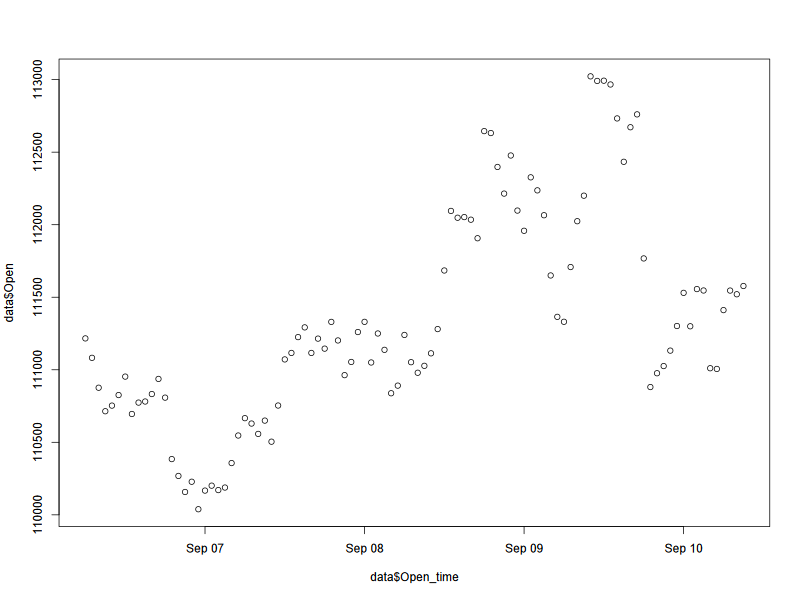

In [21]:
plot(data$Open_time, data$Open)

## Google SpreadSheets

In [1]:
install.packages("googlesheets4")
library(googlesheets4)

also installing the dependencies ‘rematch’, ‘uuid’, ‘cellranger’, ‘gargle’, ‘googledrive’, ‘httr’, ‘ids’, ‘rematch2’



trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/rematch_2.0.0.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/uuid_1.2-1.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/cellranger_1.1.0.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/gargle_1.6.0.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/googledrive_2.1.1.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/httr_1.4.7.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/ids_1.0.1.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/rematch2_2.1.2.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/googlesheets4_1.1.2.zip'


package ‘rematch’ successfully unpacked and MD5 sums checked
package ‘uuid’ successfully unpacked and MD5 sums checked
package ‘cellranger’ successfully unpacked and MD5 sums checked
package ‘gargle’ successfully unpacked and MD5 sums checked
package ‘googledrive’ successfully unpacked and MD5 sums checked
package ‘httr’ successfully unpacked and MD5 sums checked
package ‘ids’ successfully unpacked and MD5 sums checked
package ‘rematch2’ successfully unpacked and MD5 sums checked
package ‘googlesheets4’ successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Yura\AppData\Local\Temp\RtmpE7sPxI\downloaded_packages


In [4]:
data = read_sheet("https://docs.google.com/spreadsheets/d/1U6Cf_qEOhiR9AZqTqS3mbMF3zt2db48ZP5v3rkrAEJY/edit#gid=780868077")
gs4_deauth()

✔ Reading from gapminder.
✔ Range Africa.


In [9]:
library(dplyr)
data |> filter(lifeExp < 30)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



# A tibble: 1 × 6
  country continent  year lifeExp     pop gdpPercap
  <chr>   <chr>     <dbl>   <dbl>   <dbl>     <dbl>
1 Rwanda  Africa     1992    23.6 7290203      737.

In [10]:
## Google Trends

In [11]:
install.packages('gtrendsR')
install.packages('ggplot2')
library(gtrendsR) 
library(ggplot2)

also installing the dependencies ‘BH’, ‘anytime’



trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/BH_1.87.0-1.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/anytime_0.3.12.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/gtrendsR_1.5.2.zip'


package ‘BH’ successfully unpacked and MD5 sums checked
package ‘anytime’ successfully unpacked and MD5 sums checked
package ‘gtrendsR’ successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Yura\AppData\Local\Temp\RtmpE7sPxI\downloaded_packages


trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/ggplot2_3.5.2.zip'
Content type 'application/zip' length 5016282 bytes (4.8 MB)
downloaded 4.8 MB



package ‘ggplot2’ successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Yura\AppData\Local\Temp\RtmpE7sPxI\downloaded_packages


In [ ]:
keywords = c("Bitcoin", "FC Barcelona") # search keywords
country = c('AT') # search region from https://support.google.com/business/answer/6270107?hl=en
time = ("2021-01-01 2021-06-01") # period
channel = 'web' # search channel: google search ('news' - google news, 'images' - google images)
trends = gtrends(keywords, gprop = channel, geo = country, time = time, tz = "UTC")
#time_trend = trends$interest_over_time
#head(time_trend)

: [1m[33mError[39m in `interest_over_time()`:[22m
[33m![39m Status code was not 200. Returned status code:429

In [13]:
trends

: [1m[33mError[39m:[22m
[33m![39m object 'trends' not found

plot <- ggplot(data=time_trend, aes(x=date, y=hits, group=keyword, col=keyword)) +
  geom_line() +
  xlab('Time') + 
  ylab('Relative Interest') + 
  theme(legend.title = element_blank(), legend.position="bottom", legend.text=element_text(size=15)) + 
  ggtitle("Google Search Volume")  

plot